In [272]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [6, 4]

## grid search

### EJ1

Estamos interesados en la proporción de éxito 𝜃 de una distribución Bernoulli. Tenemos una
muestra observada que consiste en el número de éxitos en 30 ensayos independientes y con idéntica distribución de una Bernoulli con parámetro 𝜃; en esta muestra hay precisamente 19 éxitos.

(a) Definir una grilla de posibles valores para 𝜃.

(b) Calcular la verosimilitud, o likelihood, para cada valor de la grilla.

(c) Suponiendo una prior uniforme sobre 𝜃, calcular la distribución posterior no normalizada y
luego normalizar.

(d) Graficar la distribución posterior obtenida y comparar con la distribución posterior teórica,
que es una Beta.

(e) Samplear y dar el 90% HPDI de la posterior y de la posterior predictive.

(f ) Calcular para cada 𝑘 la probabilidad de obtener 𝑘 éxitos en 10 experimentos con la posterior
predictive. ¿Se trata ésta de una distribución binomial?



<Axes: >

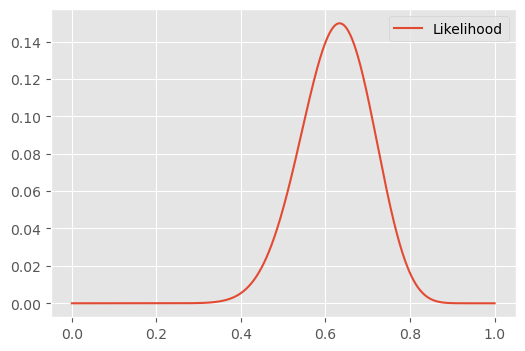

In [273]:
# a theta entre 0 y 1.
theta_grid = np.linspace(0, 1, 1000)
# b calcular likelihood  -> evidencia 16 exitos de 30 intentos. distribucion es binomial.
sample_size = 30
successes = 19

P_sample = successes / sample_size

ll = st.binom.pmf(k=successes, n=sample_size, p=theta_grid)
sns.lineplot(x=theta_grid, y=ll, label="Likelihood")

<Axes: >

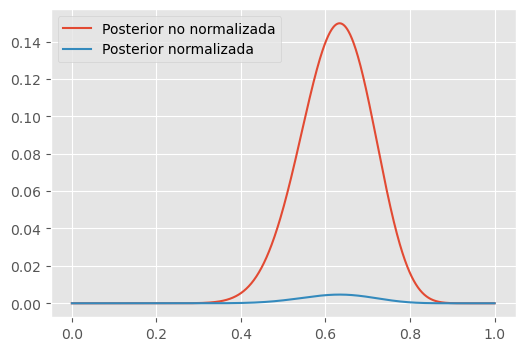

In [274]:
# c con prior uniforme calcular posterior no normalizada

prior = st.uniform(0, 1).pdf(theta_grid)

posterior = ll * prior

sns.lineplot(x=theta_grid, y=posterior, label="Posterior no normalizada")

normalized_posterior = posterior / np.sum(posterior)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

<Axes: >

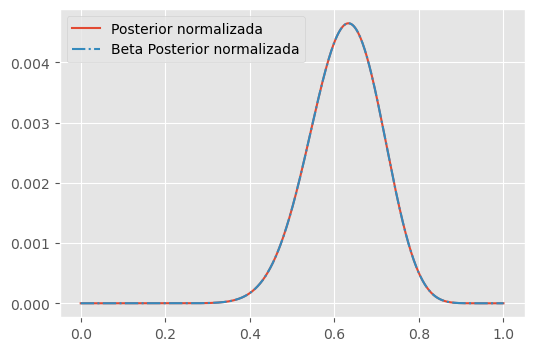

In [275]:
# d
sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

beta_posterior = st.beta(a=successes + 1, b=sample_size - successes + 1).pdf(theta_grid)
beta_posterior_normalized = beta_posterior / np.sum(beta_posterior)


sns.lineplot(
    x=theta_grid,
    y=beta_posterior_normalized,
    label="Beta Posterior normalizada",
    linestyle="-.",
)

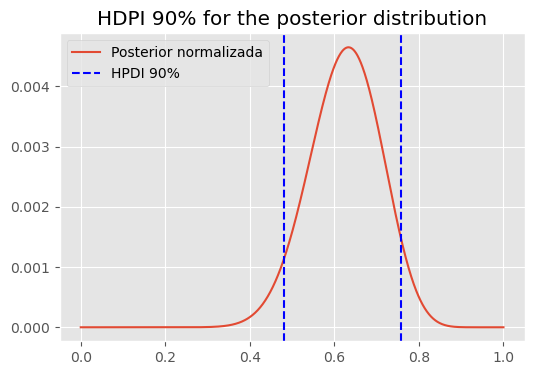

In [276]:
# e) 90% HPDI


def HPDI(posterior, theta_grid, alpha=0.05):
    posterior = posterior / np.sum(posterior)
    posterior = pd.Series(posterior, index=theta_grid)
    posterior = posterior.cumsum()
    lower = posterior[posterior <= alpha / 2].index.max()
    upper = posterior[posterior >= 1 - alpha / 2].index.min()
    return lower, upper


lower, upper = HPDI(normalized_posterior, theta_grid, 0.1)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")
plt.axvline(lower, color="b", linestyle="--", label="HPDI 90%")
plt.axvline(upper, color="b", linestyle="--")
plt.title("HDPI 90% for the posterior distribution")
plt.legend()

0 0.3750000000000001
1 0.6250000000000003


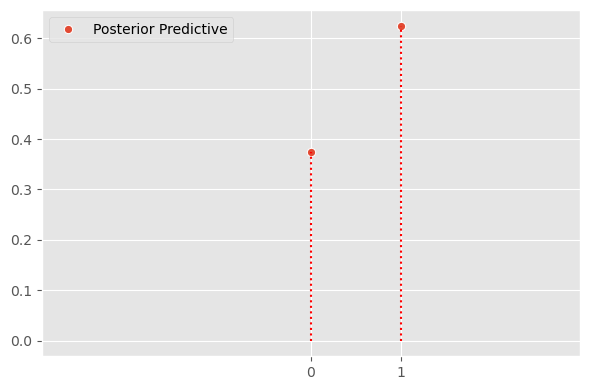

In [277]:
sampling_values = [0, 1]
posterior_predictive = []
for k in sampling_values:
    sampling_distribution = st.bernoulli.pmf(k=k, p=theta_grid)
    posterior_predictive.append(sum(sampling_distribution * normalized_posterior))


sns.lineplot(
    x=sampling_values,
    y=posterior_predictive,
    label="Posterior Predictive",
    marker="o",
    linestyle="",
)

for x, y in zip(sampling_values, posterior_predictive):
    print(x, y)
    plt.vlines(x, 0, y, colors="r", linestyles="dotted")

plt.xticks([0, 1])
plt.xlim((-3, 3))
plt.tight_layout()

<Axes: >

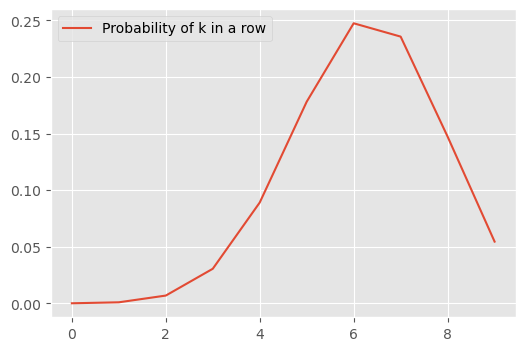

In [278]:
t = range(0, 10)
k_in_a_row = st.binom.pmf(k=t, n=10, p=posterior_predictive[1])

sns.lineplot(x=t, y=k_in_a_row, label="Probability of k in a row")

### EJ2

idem EJ1 con un prior uniforme en 0-0.5 con peso 0.3 y en 0.5-1 con peso 0.7

<Axes: >

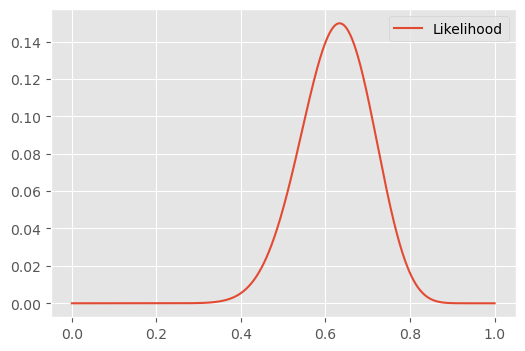

In [279]:
# a theta entre 0 y 1.
grid_size = 1000
theta_grid = np.linspace(0, 1, grid_size)
# b calcular likelihood  -> evidencia 16 exitos de 30 intentos. distribucion es binomial.
sample_size = 30
successes = 19

P_sample = successes / sample_size

ll = st.binom.pmf(k=successes, n=sample_size, p=theta_grid)
sns.lineplot(x=theta_grid, y=ll, label="Likelihood")

<Axes: >

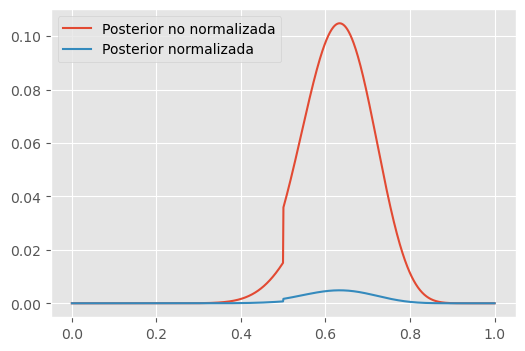

In [280]:
# c uniforme en [0, 0.5] con peso 0.3 y otra uniforme en [0.5, 1] con peso 0.7

prior = np.concatenate(
    (np.ones(int(grid_size / 2)) * 0.3, np.ones(int(grid_size / 2)) * 0.7)
)

posterior = ll * prior

sns.lineplot(x=theta_grid, y=posterior, label="Posterior no normalizada")

normalized_posterior = posterior / np.sum(posterior)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

<Axes: >

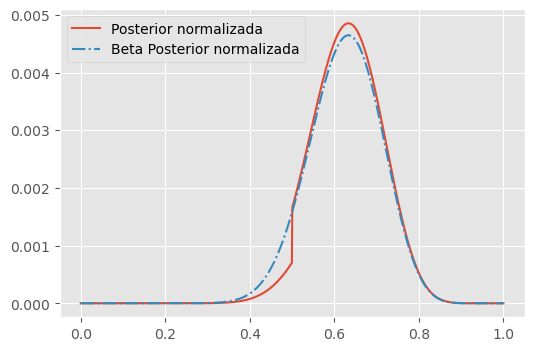

In [281]:
# d
sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

beta_posterior = st.beta(a=successes + 1, b=sample_size - successes + 1).pdf(theta_grid)
beta_posterior_normalized = beta_posterior / np.sum(beta_posterior)


sns.lineplot(
    x=theta_grid,
    y=beta_posterior_normalized,
    label="Beta Posterior normalizada",
    linestyle="-.",
)

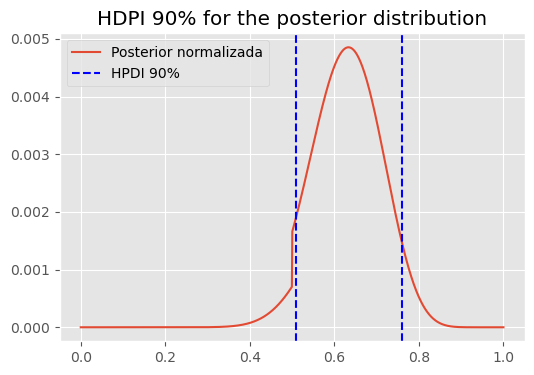

In [282]:
# e) 90% HPDI
def HPDI(posterior, theta_grid, alpha=0.05):
    posterior = posterior / np.sum(posterior)
    posterior = pd.Series(posterior, index=theta_grid)
    posterior = posterior.cumsum()
    lower = posterior[posterior <= alpha / 2].index.max()
    upper = posterior[posterior >= 1 - alpha / 2].index.min()
    return lower, upper


lower, upper = HPDI(normalized_posterior, theta_grid, 0.1)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")
plt.axvline(lower, color="b", linestyle="--", label="HPDI 90%")
plt.axvline(upper, color="b", linestyle="--")
plt.title("HDPI 90% for the posterior distribution")
plt.legend()

0 0.36764480842862207
1 0.6323551915713783


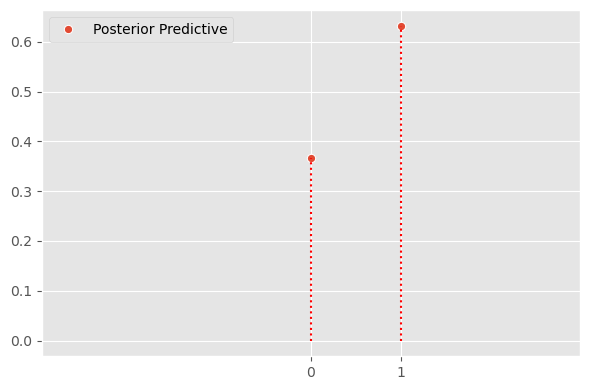

In [283]:
sampling_values = [0, 1]
posterior_predictive = []
for k in sampling_values:
    sampling_distribution = st.bernoulli.pmf(k=k, p=theta_grid)
    posterior_predictive.append(sum(sampling_distribution * normalized_posterior))


sns.lineplot(
    x=sampling_values,
    y=posterior_predictive,
    label="Posterior Predictive",
    marker="o",
    linestyle="",
)

for x, y in zip(sampling_values, posterior_predictive):
    print(x, y)
    plt.vlines(x, 0, y, colors="r", linestyles="dotted")

plt.xticks([0, 1])
plt.xlim((-3, 3))
plt.tight_layout()

<Axes: >

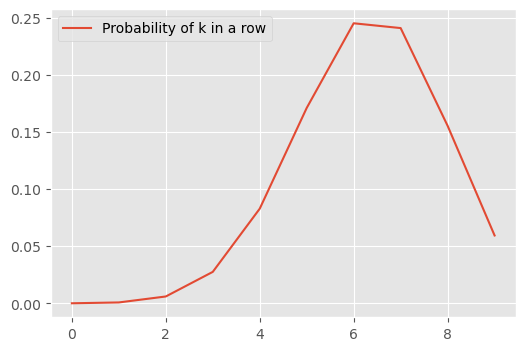

In [284]:
t = range(0, 10)
k_in_a_row = st.binom.pmf(k=t, n=10, p=posterior_predictive[1])

sns.lineplot(x=t, y=k_in_a_row, label="Probability of k in a row")

### EJ3

Value for max PP : 0.555


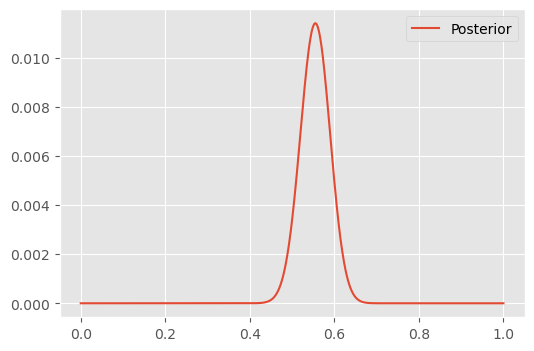

In [285]:
theta_grid = np.linspace(0, 1, 1000)
prior = st.uniform(0, 1).pdf(theta_grid)

male, female = 111, 89
sample_size = male + female

ll = st.binom.pmf(p=theta_grid, n=sample_size, k=male)

posterior = ll * prior / np.sum(ll * prior)

sns.lineplot(x=theta_grid, y=posterior, label="Posterior")
print(f"Value for max PP : {theta_grid[np.argmax(posterior)]:.3f}")

In [286]:
for coverage in [0.5, 0.89, 0.97]:
    lower, upper = HPDI(posterior, theta_grid, 1 - coverage)
    print(f"HPDI {coverage}: [{lower:.3f}, {upper:.3f}]")

HPDI 0.5: [0.530, 0.579]
HPDI 0.89: [0.497, 0.610]
HPDI 0.97: [0.477, 0.630]


Value for max predictive PP : 111


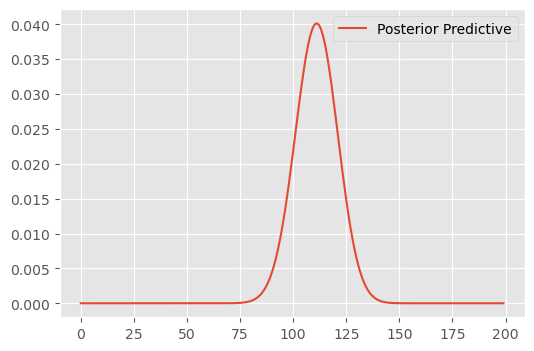

In [287]:
sampling_values = np.arange(0, 200)
posterior_predictive = []

for k in sampling_values:
    sampling_distribution = st.binom.pmf(k=k, n=sample_size, p=theta_grid)
    posterior_predictive.append(sum(sampling_distribution * posterior))

sns.lineplot(x=sampling_values, y=posterior_predictive, label="Posterior Predictive")
print(
    f"Value for max predictive PP : {sampling_values[np.argmax(posterior_predictive)]}"
)

<Axes: ylabel='Count'>

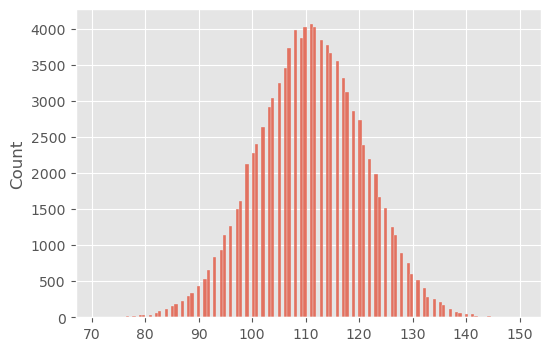

In [288]:
sex_ratio_sampling = np.random.choice(
    sampling_values, p=posterior_predictive, size=100000
)

sns.histplot(
    sex_ratio_sampling
)  ## ya hice la posterior predictiva que me da la misma informacion

### EJ4

5 percentile: 148.0
25 percentile: 159.0
50 percentile: 167.0
75 percentile: 175.0
95 percentile: 187.0


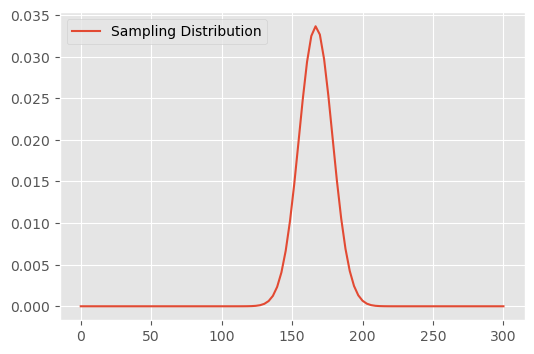

In [289]:
# Y ~ cantidad de "6" que sale en 1000 tiradas de un dado equilibrado

samples = np.array(
    [np.random.randint(1, 7, 1000).tolist().count(6) for _ in range(5000)]
)

sampling_distribution = st.norm(loc=np.mean(samples), scale=np.std(samples))

sns.lineplot(
    x=np.linspace(0, 300, 100),
    y=sampling_distribution.pdf(np.linspace(0, 300, 100)),
    label="Sampling Distribution",
)

for percentile in [5, 25, 50, 75, 95]:
    print(f"{percentile} percentile: {np.percentile(samples, percentile)}")

### EJ5

5 percentile: 76.0
25 percentile: 136.0
50 percentile: 167.0
75 percentile: 217.0
95 percentile: 262.0


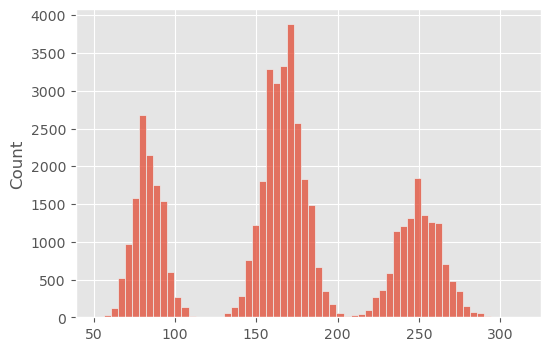

In [290]:
# dado no necesariamente equilibrado, theta es la probabilidad de sacar 6

theta_prior_sample = np.random.choice(
    [1 / 12, 1 / 6, 1 / 4], p=[0.25, 0.5, 0.25], size=50000
)
y_prior_samples = st.binom(p=theta_prior_sample, n=1000).rvs()
sns.histplot(y_prior_samples)

for percentile in [5, 25, 50, 75, 95]:
    print(f"{percentile} percentile: {np.percentile(y_prior_samples, percentile)}")

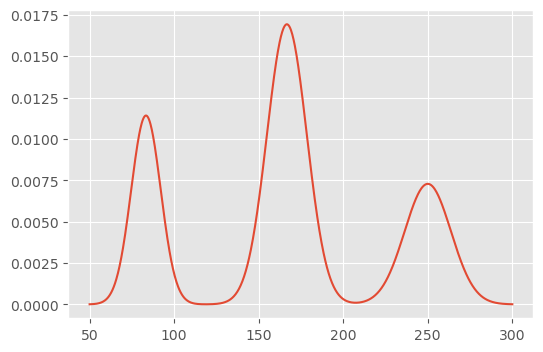

In [291]:
### OTRA MANERA DE HACERLO --> uso de la distribucion normal, la integral de P(y) = P(y|theta)P(theta) dtheta = sum(P(y|theta)P(theta))

n = 1000
x = np.linspace(50, 300, 1000)

prior_12 = 0.25
prior_6 = 0.5
prior_4 = 0.25

p = 1 / 12
L_12 = st.norm.pdf(x, loc=n * p, scale=np.sqrt(n * p * (1 - p)))
p = 1 / 6
L_6 = st.norm.pdf(x, loc=n * p, scale=np.sqrt(n * p * (1 - p)))
p = 1 / 4
L_4 = st.norm.pdf(x, loc=n * p, scale=np.sqrt(n * p * (1 - p)))

p_y = L_12 * prior_12 + L_6 * prior_6 + L_4 * prior_4


plt.plot(x, p_y)

### EJ6

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -203.51249286154354
        x: [ 4.615e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 1.911e-02]]
     nfev: 8
     njev: 4
Posterior mode: 0.462
Information matrix: 39.4716552693114
Standard deviation approx: 0.159


<Axes: >

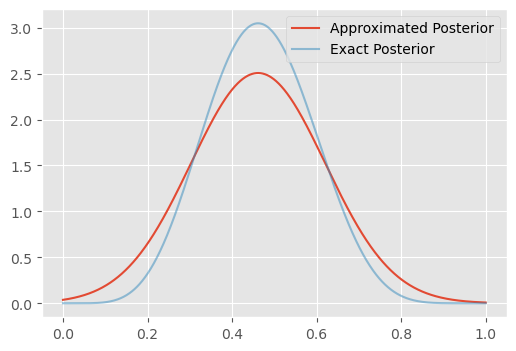

In [331]:
# theta = prob de cara
from scipy.special import comb

theta_grid = np.linspace(0, 1, 1000)
prior = st.beta(a=3, b=2)

caras, monedas = 4, 10


def neg_log_posterior_binomial(theta, y, n):  # n conocido y fijo.

    log_likelihood = np.sum(
        comb(N=n, k=y) + y * np.log(theta) + (n - y) * np.log(1 - theta)
    )

    log_prior = np.log(st.beta(a=3, b=2).pdf(theta))

    return -(log_likelihood + log_prior)


def log_posterior_binomial_second_derivative(theta, y, n):
    return np.sum(((2 * theta - 1) * y - n * theta**2) / (theta * (theta - 1)) ** 2)


res = minimize(neg_log_posterior_binomial, 0.46, args=(caras, monedas))
posterior_mode = res.x[0]

print(res)

I = -log_posterior_binomial_second_derivative(posterior_mode, caras, monedas)
std_approx = np.sqrt(1 / I)

print(f"Posterior mode: {posterior_mode:.3f}")
print(f"Information matrix: {I}")
print(f"Standard deviation approx: {std_approx:.3f}")

approximated_posterior = st.norm(loc=posterior_mode, scale=std_approx).pdf(theta_grid)
sns.lineplot(x=theta_grid, y=approximated_posterior, label="Approximated Posterior")

exact_posterior = st.beta(a=caras + 3, b=monedas - caras + 2).pdf(theta_grid)
sns.lineplot(x=theta_grid, y=exact_posterior, label="Exact Posterior", alpha=0.5)

### EJ 7

In [345]:
## con priors uniformes
## ver ecuacion en pag 94 libro BDA3

y = st.norm.rvs(loc=0.5, scale=0.1, size=100)


def neg_log_likelihood_gaussian(params, y):
    mu, sigma = params
    mean = np.mean(y)
    n = len(y)
    s2 = np.var(y)
    ll = -np.log(sigma) - (1 / (2 * sigma**2)) * ((n - 1) * s2 + n * (mean - mu) ** 2)
    return -ll


res = minimize(neg_log_likelihood_gaussian, [y.mean(), y.std()], args=(y))
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.4592249320924579
        x: [ 4.938e-01  9.600e-01]
      nit: 7
      jac: [-7.972e-06 -2.045e-06]
 hess_inv: [[ 9.485e-03  3.684e-03]
            [ 3.684e-03  5.127e-01]]
     nfev: 39
     njev: 13


In [367]:
# Define the mean vector and covariance matrix
mean = np.array([res.x[0], np.log(res.x[1])])
cov = np.array([[res.x[1] / len(y), 0], [0, 1 / (2 * len(y))]])

# Generate random samples from the multivariate normal distribution
samples = np.random.multivariate_normal(mean, cov, 2000)

# Extract x and y coordinates from the samples
x = samples[:, 0]
y = samples[:, 1]

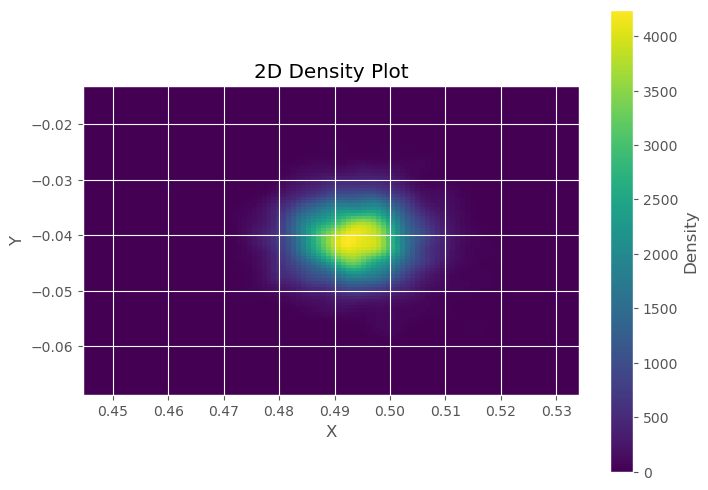

In [370]:
from scipy.stats import gaussian_kde


def plot_2d_density(x, y, grid_size=100, cmap="viridis"):
    """
    Plot a 2D density plot for given x and y data.

    Parameters:
    - x: array-like, shape (n,)
    - y: array-like, shape (n,)
    - grid_size: int, optional (default=100)
        Number of grid points in each dimension.
    - cmap: str or Colormap, optional (default='viridis')
        Colormap to use for the density plot.
    """
    # Check if x and y are the same length
    if len(x) != len(y):
        raise ValueError("The length of x and y must be the same")

    # Perform the kernel density estimate
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy, bw_method="scott")

    # Create a grid over which to evaluate the KDE
    xmin, xmax = x.min() - 2.2 * x.std(), x.max() + 2.2 * x.std()
    ymin, ymax = y.min() - 2.2 * y.std(), y.max() + 2.2 * y.std()
    xx, yy = np.mgrid[xmin : xmax : grid_size * 1j, ymin : ymax : grid_size * 1j]
    positions = np.vstack([xx.ravel(), yy.ravel()])

    # Evaluate the KDE on the grid
    f = np.reshape(kde(positions).T, xx.shape)

    # Plot the result
    plt.figure(figsize=(8, 6))
    plt.imshow(np.rot90(f), cmap=cmap, extent=[xmin, xmax, ymin, ymax])
    plt.colorbar(label="Density")
    # plt.scatter(x, y, s=1, color="white")
    plt.title("2D Density Plot")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


# Example usage
plot_2d_density(x, y)